<a href="https://colab.research.google.com/github/wise0102/P02_SSH/blob/main/TALLER/EVALUACION/CHAMBI_TURPO_ALAIN_EVA_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Análisis y Preparación de Datos--------------------------------------------------------------------------**


In [18]:
# 2. Carga y combinación de los datasets
import pandas as pd

df1 = pd.read_csv("index_1.csv")
df2 = pd.read_csv("index_2.csv")

# Eliminar columna 'card' para unificar estructura
df1 = df1.drop(columns=["card"])

# Unir ambos datasets
df = pd.concat([df1, df2], ignore_index=True)
df["datetime"] = pd.to_datetime(df["datetime"], format='mixed', errors='coerce')

df["date"] = pd.to_datetime(df["date"])
print(df)

           date                datetime cash_type  money  \
0    2024-03-01 2024-03-01 10:15:50.520      card   38.7   
1    2024-03-01 2024-03-01 12:19:22.539      card   38.7   
2    2024-03-01 2024-03-01 12:20:18.089      card   38.7   
3    2024-03-01 2024-03-01 13:46:33.006      card   28.9   
4    2024-03-01 2024-03-01 13:48:14.626      card   38.7   
...         ...                     ...       ...    ...   
3893 2025-03-23 2025-03-23 14:55:46.000      cash   30.0   
3894 2025-03-23 2025-03-23 15:15:36.000      card   25.0   
3895 2025-03-23 2025-03-23 17:59:25.000      card   28.0   
3896 2025-03-23 2025-03-23 18:01:33.000      card   28.0   
3897 2025-03-23 2025-03-23 21:23:11.000      card   29.0   

                     coffee_name  
0                          Latte  
1                  Hot Chocolate  
2                  Hot Chocolate  
3                      Americano  
4                          Latte  
...                          ...  
3893                  Cappuccino  

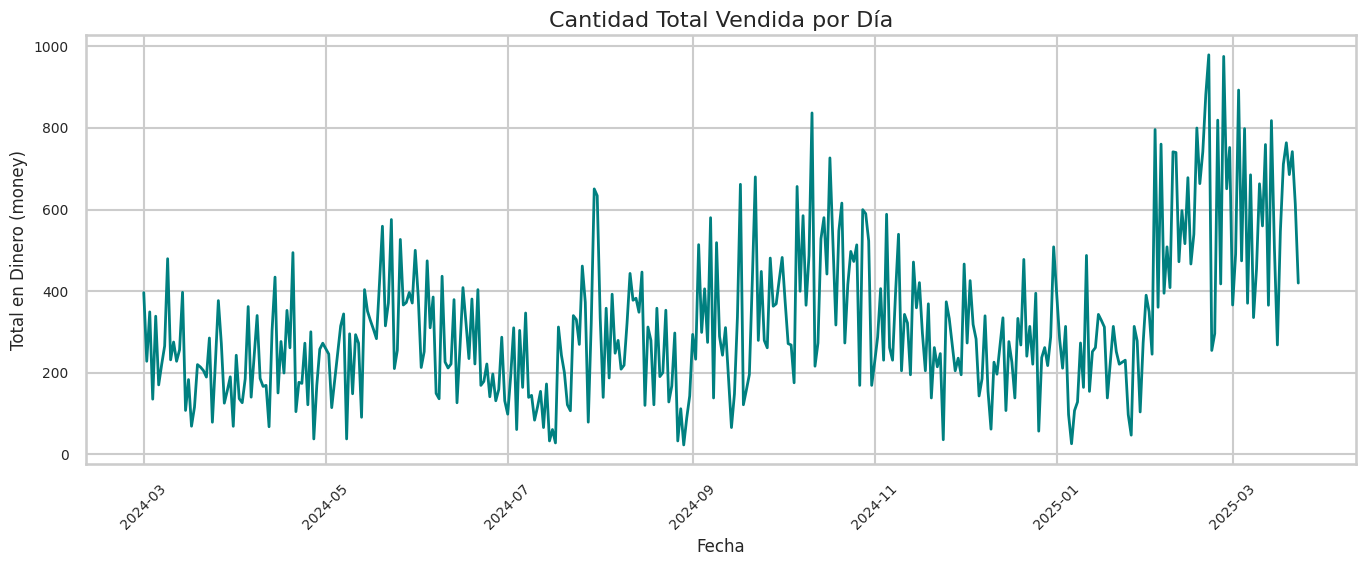

In [21]:

# 3. Ingeniería de características
df["month"] = df["datetime"].dt.month
df["day_of_week"] = df["datetime"].dt.dayofweek
df["hour"] = df["datetime"].dt.hour

# 4. Crear variable objetivo: cantidad_total_vendida_no_dia
ventas_diarias = df.groupby("date")["money"].sum().reset_index(name="cantidad_total_vendida_no_dia")

# 5. Visualización de ventas por día
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

sns.lineplot(data=ventas_diarias, x="date", y="cantidad_total_vendida_no_dia", color='teal', linewidth=2)

plt.title("Cantidad Total Vendida por Día", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Total en Dinero (money)", fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()



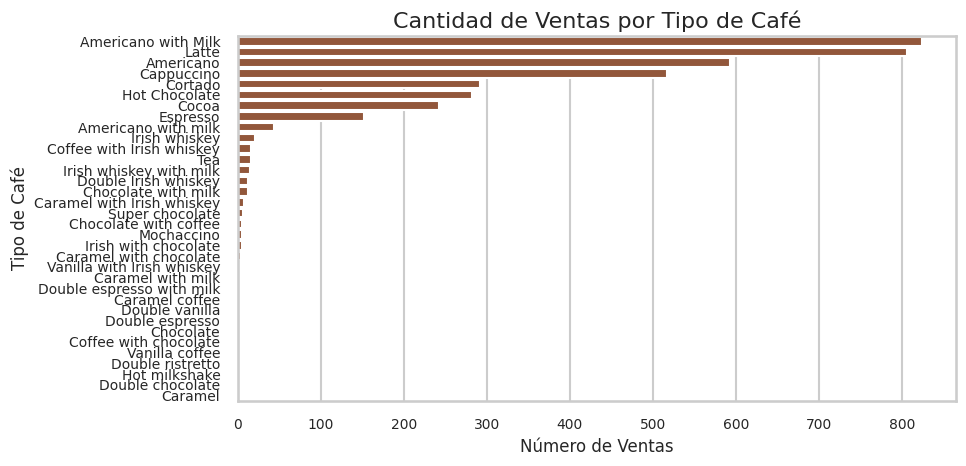

In [22]:
# 6. Visualización de ventas por tipo de café
plt.figure(figsize=(10, 5))

sns.countplot(
    data=df,
    y="coffee_name",
    order=df["coffee_name"].value_counts().index,
    color='sienna'
)

plt.title("Cantidad de Ventas por Tipo de Café", fontsize=16)
plt.xlabel("Número de Ventas", fontsize=12)
plt.ylabel("Tipo de Café", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()



In [23]:

# Agrupar X por día para que coincida con ventas_diarias
X_features = df.groupby("date")[["month", "day_of_week", "hour"]].mean().reset_index()

# Unir con y (ventas_diarias)
dataset = pd.merge(ventas_diarias, X_features, on="date")

# Preparar X e y finales
X = dataset[["month", "day_of_week", "hour"]]
y = dataset["cantidad_total_vendida_no_dia"]

# Escalado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**2. Modelado Predictivo (con TensorFlow Keras)--------------------------------------------------------------------------**

In [24]:
# Entrenamiento con TensorFlow Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Salida continua
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 138920.7031 - mae: 324.7544 - val_loss: 130597.4297 - val_mae: 322.8243
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 139170.1094 - mae: 322.8286 - val_loss: 130168.2422 - val_mae: 322.1310
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 156105.8438 - mae: 336.7252 - val_loss: 129573.5312 - val_mae: 321.1746
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 132048.7969 - mae: 308.7096 - val_loss: 128735.8984 - val_mae: 319.8218
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 130235.0703 - mae: 315.3204 - val_loss: 127523.9219 - val_mae: 317.8542
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 130182.6406 - mae: 313.9779 - val_loss: 125903.9219 - val_mae: 315.2033
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 144615.3281 - mae: 321.2819 - val_loss: 123688.8828 - val_mae: 311.5373
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 147417.6094 - mae: 327.3644 - val_loss: 1

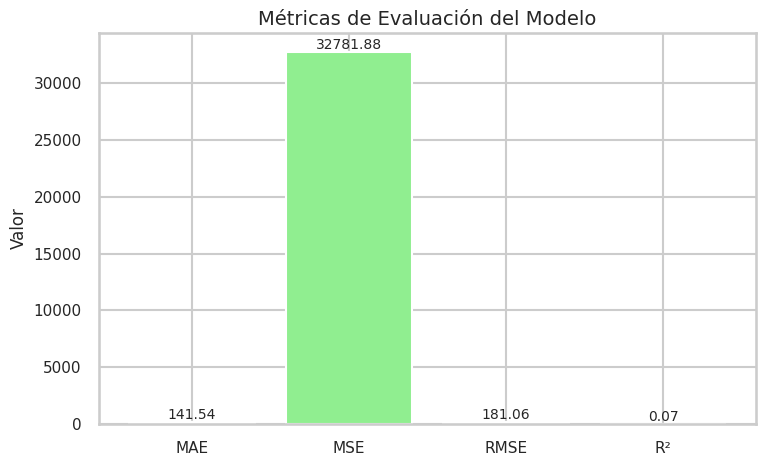

MAE:  141.54
MSE:  32781.88
RMSE: 181.06
R²:   0.0733


In [28]:
import matplotlib.pyplot as plt

# Métricas
metricas = ['MAE', 'MSE', 'RMSE', 'R²']
valores = [mae, mse, rmse, r2]

# Gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(metricas, valores, color=['skyblue', 'lightgreen', 'salmon', 'plum'])

# Agregar etiquetas a cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)


plt.title('Métricas de Evaluación del Modelo', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


In [29]:
# Agrupar: suma de dinero por café y día
df_cafe_dia = df.groupby(["date", "coffee_name"])["money"].sum().unstack(fill_value=0).reset_index()

# Extraer características de fecha (mes, día, hora promedio ese día)
features_dia = df.groupby("date")[["month", "day_of_week", "hour"]].mean().reset_index()

# Unir ambos
df_multi = pd.merge(df_cafe_dia, features_dia, on="date")

# Preparar X (features) e Y (ventas por tipo de café)
X_multi = df_multi[["month", "day_of_week", "hour"]]
Y_multi = df_multi.drop(columns=["date", "month", "day_of_week", "hour"])

In [31]:
# Escalar características
scaler_multi = StandardScaler()
X_multi_scaled = scaler_multi.fit_transform(X_multi)

# Dividir en entrenamiento y prueba
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi_scaled, Y_multi, test_size=0.2, random_state=42
)

In [32]:
# Crear modelo con una salida por tipo de café
model_multi = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_m.shape[1],)),
    Dense(32, activation='relu'),
    Dense(Y_multi.shape[1])  # Una salida por tipo de café
])

model_multi.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_multi = model_multi.fit(
    X_train_m, y_train_m, validation_split=0.2, epochs=50, batch_size=16
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 890.4916 - mae: 9.2319 - val_loss: 958.5381 - val_mae: 9.5956
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 925.4166 - mae: 9.6361 - val_loss: 954.3499 - val_mae: 9.6154
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 900.3158 - mae: 9.2766 - val_loss: 947.6758 - val_mae: 9.6397
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 920.8106 - mae: 9.4854 - val_loss: 936.4122 - val_mae: 9.6638
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 921.3857 - mae: 9.8388 - val_loss: 917.3929 - val_mae: 9.6616
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 860.5655 - mae: 9.4207 - val_loss: 888.1647 - val_mae: 9.6380
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 953.0977 - mae: 10.1416 - val_loss: 845.7869 - val_mae: 9.5934
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 797.5974 - mae: 9.2553 - val_loss: 791.1937 - val_mae: 9.4352
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

In [35]:
# Predicciones
y_pred_m = model_multi.predict(X_test_m)

# Evaluación por tipo de café con separadores
for i, col in enumerate(Y_multi.columns):
    mae = mean_absolute_error(y_test_m.iloc[:, i], y_pred_m[:, i])
    mse = mean_squared_error(y_test_m.iloc[:, i], y_pred_m[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_m.iloc[:, i], y_pred_m[:, i])

    print(f"* {col} → MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")
    print("-" * 70)  # línea divisoria


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
* Americano → MAE: 37.13 | RMSE: 49.47 | R²: 0.0820
----------------------------------------------------------------------
* Americano with Milk → MAE: 49.41 | RMSE: 64.13 | R²: 0.0216
----------------------------------------------------------------------
* Americano with milk → MAE: 6.32 | RMSE: 13.71 | R²: 0.0663
----------------------------------------------------------------------
* Cappuccino → MAE: 33.94 | RMSE: 40.94 | R²: -0.0764
----------------------------------------------------------------------
* Caramel → MAE: 0.20 | RMSE: 0.23 | R²: 0.0000
----------------------------------------------------------------------
* Caramel coffee → MAE: 0.43 | RMSE: 3.21 | R²: -0.0255
----------------------------------------------------------------------
* Caramel with Irish whiskey → MAE: 1.99 | RMSE: 7.72 | R²: -0.0101
----------------------------------------------------------------------
* Caramel with chocolate → MAE: 0.96 | RMSE: 4.47 | R²: -0.0091


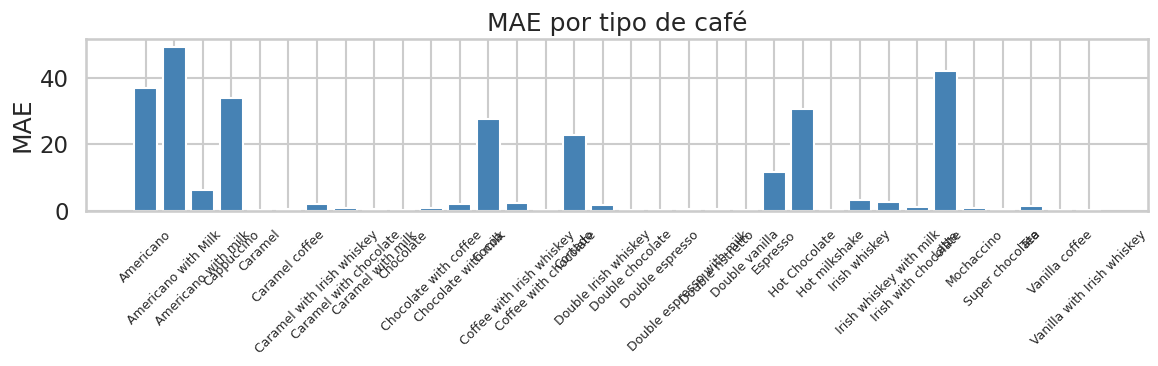

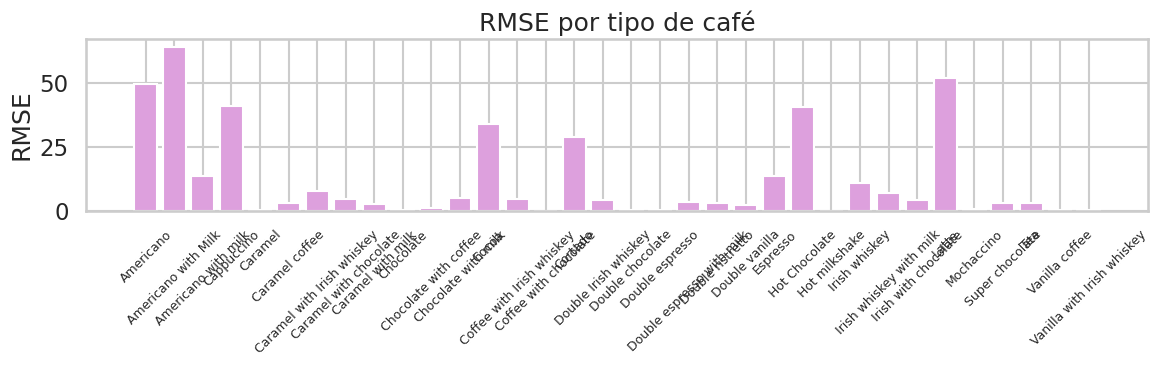

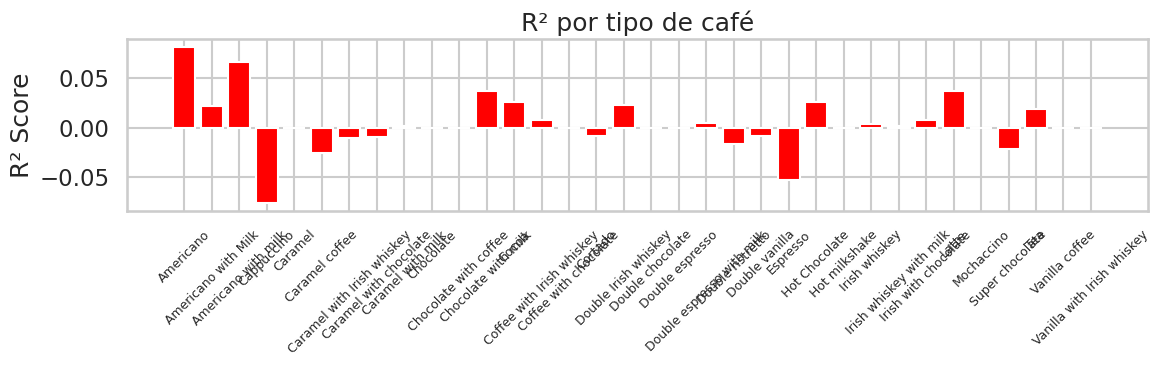

In [41]:
import matplotlib.pyplot as plt

# Listas para almacenar métricas
mae_list, rmse_list, r2_list = [], [], []

# Calcular métricas por tipo de café
for i, col in enumerate(Y_multi.columns):
    mae = mean_absolute_error(y_test_m.iloc[:, i], y_pred_m[:, i])
    mse = mean_squared_error(y_test_m.iloc[:, i], y_pred_m[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_m.iloc[:, i], y_pred_m[:, i])

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Etiquetas
labels = list(Y_multi.columns)
x = range(len(labels))

# --- MAE ---
plt.figure(figsize=(12, 4))
plt.bar(x, mae_list, color='steelblue')
plt.xticks(x, labels, rotation=45, fontsize=9)
plt.title('MAE por tipo de café')
plt.ylabel('MAE')
plt.tight_layout()
plt.show()

# --- RMSE ---
plt.figure(figsize=(12, 4))
plt.bar(x, rmse_list, color='plum')
plt.xticks(x, labels, rotation=45, fontsize=9)
plt.title('RMSE por tipo de café')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

# --- R² ---
plt.figure(figsize=(12, 4))
plt.bar(x, r2_list, color='red')
plt.xticks(x, labels, rotation=45, fontsize=9)
plt.title('R² por tipo de café')
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()


**3. Serialización del Modelo--------------------------------------------------------------------------**

In [42]:
# Guardar modelo de ventas totales por día
model.compile(optimizer='adam', loss='mean_squared_error')

# Guardar modelo de ventas por tipo de café en h5
model_multi.save("modelo_por_tipo.h5")

In [49]:
# Compilar el modelo (si no se ha hecho aún)
model.compile(optimizer='adam', loss='mean_squared_error')

# Guardar el modelo completo en formato .keras
model.save("modelo_ventas_totales.keras")


In [50]:
import joblib

# Guardar el escalador para el modelo total
joblib.dump(scaler, "scaler_total.pkl")

# Guardar el escalador para el modelo por tipo
joblib.dump(scaler_multi, "scaler_tipo.pkl")

['scaler_tipo.pkl']

In [48]:
#DESCARGAR LOS ARCHIVOS DE FORMA AUTOMATICA
from google.colab import files
files.download("modelo_ventas_totales.keras")
files.download("modelo_por_tipo.h5")
files.download("scaler_total.pkl")
files.download("scaler_tipo.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>